In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib

# 데이터프레임 생성 및 데이터 로드

In [27]:
eda_pj = pd.read_csv("./data/eda-proj-fc-purchase.csv")
eda_pj.dtypes

거래id          int64
유형           object
고객id          int64
코스ID          int64
사이트          object
포맷           object
카테고리         object
코스(상품) 이름    object
거래일자         object
쿠폰이름         object
판매가격         object
결제수단         object
실거래금액         int64
쿠폰할인액        object
거래금액         object
환불금액         object
dtype: object

In [28]:
### 거래일자에서 오전, 오후, 빈칸, . 삭제
dates = eda_pj['거래일자'].str.replace("오전", "") 
dates = dates.str.replace("오후", "")
dates = dates.str.replace(" ", "")
dates = dates.str.replace(".", " ")

### 거래일자에서 월 만 추출하여 month에 저장
month = []
for i in range(len(dates)):
    redate = datetime.datetime.strptime(dates[i], '%Y %m %d %H:%M:%S')
    redate = redate.strftime('%m')
    month.append(redate)

### eda_pj에 '월' column 추가
eda_pj['월'] = month

### 환불금액, 거래금액, 쿠폰할인액의 '-' 제거 및 dtype을 int로 변경
eda_pj['환불금액'] = eda_pj['환불금액'].replace("-", "0").astype(int)
eda_pj['거래금액'] = eda_pj['거래금액'].replace("-", "0").astype(int)
eda_pj['쿠폰할인액'] = eda_pj['쿠폰할인액'].replace("-", "0").astype(int)

eda_pj

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,월
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,0,159000,0,12
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,0,501000,0,12
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,0,549000,0,12
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,0,12
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,0,239000,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,0,01
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,0,385000,0,01
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,0,01
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 1. 2. 오전 11:01:24,-,289000,VBANK,289000,0,289000,0,01


In [29]:
eda_pj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  int64 
 14  거래금액       159328 non-null  int64 
 15  환불금액       159328 non-null  int64 
 16  월          159328 non-null  object
dtypes: int64(7), object(10)
memory usage: 20.7+ MB


In [30]:
eda_pj.describe()

,거래id,고객id,코스ID,실거래금액,쿠폰할인액,거래금액,환불금액
count,1.593280e+05,159328.000000,159328.000000,1.593280e+05,1.593280e+05,1.593280e+05,1.593280e+05
mean,1.968703e+06,50061.549903,207679.355123,1.418337e+05,4.928870e+04,1.559904e+05,-1.415675e+04
std,2.516892e+05,28850.738273,3541.408820,1.397796e+05,8.447793e+04,1.093086e+05,5.633219e+04
min,1.486194e+06,0.000000,2204.000000,-1.054400e+06,0.000000e+00,0.000000e+00,-1.054400e+06
25%,1.743640e+06,25081.500000,204373.000000,7.800000e+04,0.000000e+00,7.800000e+04,0.000000e+00
50%,1.971748e+06,50082.500000,207161.000000,1.620000e+05,0.000000e+00,1.620000e+05,0.000000e+00
75%,2.188854e+06,75071.000000,210796.000000,2.176000e+05,4.660000e+04,2.176000e+05,0.000000e+00
max,2.417084e+06,99999.000000,214834.000000,1.339200e+06,2.000000e+06,1.339200e+06,0.000000e+00


# 총 매출금액과 총 환불금액 비교

In [31]:
# 총 매출금액
total = 0
for i in range(len(eda_pj['실거래금액'])):
    if (eda_pj['실거래금액'][i]) > 0:  # 실거래금액에서 환불금액(-값)을 제외한 금액의 합
        total += eda_pj['실거래금액'][i]

print(total)

# 총 환불 금액
refund = 0
for j in range(len(eda_pj['환불금액'])):
    if (eda_pj['환불금액'][j]) != "-":
        refund += int(eda_pj['환불금액'][j])

print(refund)

24853638278
-2255566195


([<matplotlib.patches.Wedge at 0x15b59e2e0>,
 [Text(-1.1109365169659142, 0.29718690292750666, '실거래금액'),
  Text(1.1109365169659142, -0.2971869029275068, '환불금액')],
 [Text(-0.6279206400242122, 0.16797520600250376, '91.7%'),
  Text(0.6279206400242122, -0.16797520600250382, '8.3%')])

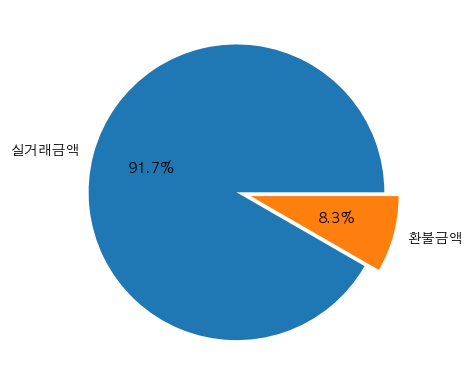

In [32]:
# 실거래금액과 환불금액의 비율 표

matplotlib.rcParams['font.family'] = 'AppleGothic' 

# total = 실거래금액, refund = 환불금액
value = [total, abs(refund)]
label = ['실거래금액','환불금액']
explode = [0.05] * 2

plt.pie(value, labels=label, autopct="%.1f%%", explode=explode)

### 실거래금액에서 환불금액이 차지하는 비율은 약 8.3% 이다.

# 월별 평균 매출금액 비교

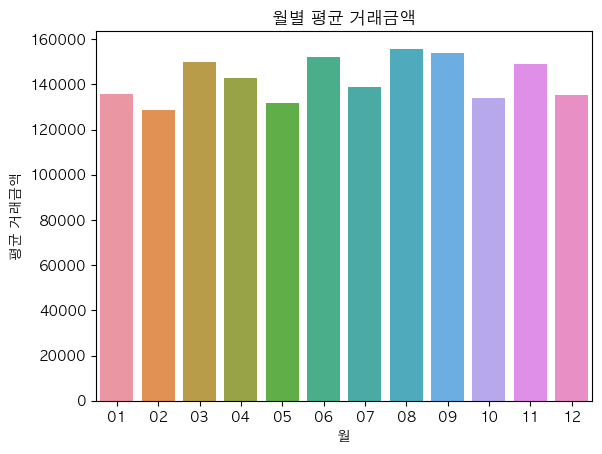

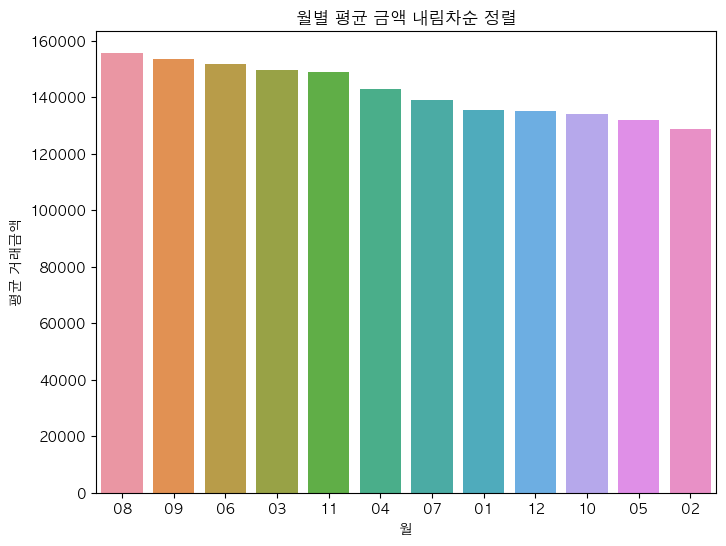

In [33]:
### eda_pj Dataframe에서 실거래금액 column만 빼내서 price_m Dataframe에 저장
price = eda_pj['실거래금액']

price_m = pd.DataFrame({
    '거래금액': price,
    'month': month
})

### price_m에서 월별로 그룹화 해서 거래금액 평균을 m_price로 저장
m_price = price_m.groupby('month').mean()

### 각 월별 평균 거래금액을 그래프화
sns.barplot(x=m_price.index, y=m_price['거래금액'], data=m_price)
plt.title("월별 평균 거래금액")
plt.xlabel("월")
plt.ylabel("평균 거래금액")
plt.show()


### 각 월별 평균 거래금액을 내림차순으로 정렬하여 그래프화
m_price = m_price.pivot_table(index=m_price.index, values='거래금액').sort_values(by='거래금액', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=m_price, x=m_price.index, y='거래금액')
plt.title("월별 평균 금액 내림차순 정렬")
plt.xlabel("월")
plt.ylabel("평균 거래금액")
plt.show()


### 2022년 월별 평균 금액은 8월이 가장 높으며 2월이 가장 낮다.
- 8, 9, 6, 3, 11월이 높은것으로 봐서 학기초 혹은 학기말에 공부를 시작하려는 사람이 많은 것으로 예상한다.

# 월별 총 매출금액 비교

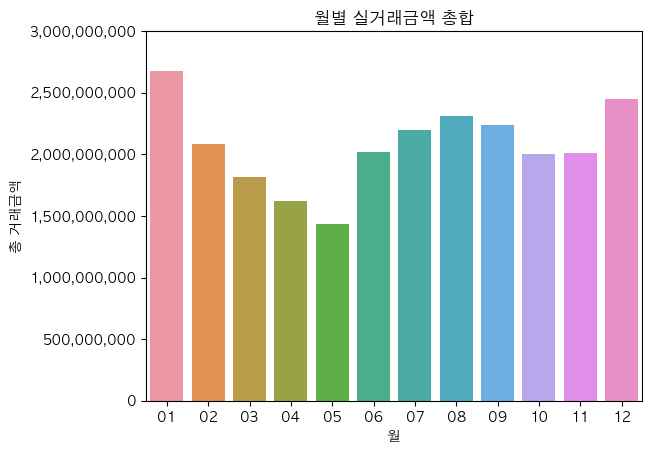

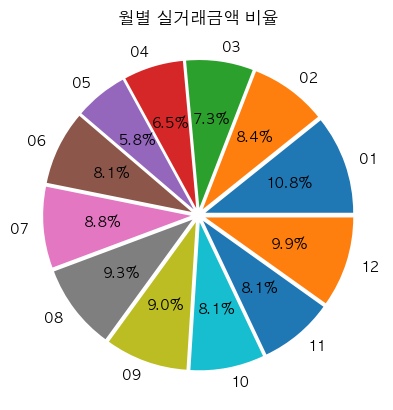

In [34]:
# 월별 총 매출을 새로운 Dataframe에 저장
ms_price = pd.DataFrame(eda_pj['실거래금액'])
ms_price['월'] = month
ms_price = ms_price[ms_price['실거래금액'] > 0] # 실거래금액이 0 초과인 데이터만 필터링
price_ms = ms_price.groupby('월')['실거래금액'].sum().reset_index() # 월별 실거래금액 총합을 price_ms에 저장

# 월별 실거래금액 총합을 bar그래프로 시각화
sns.barplot(data=price_ms, x='월', y='실거래금액')
plt.title("월별 실거래금액 총합")
plt.xlabel("월")
plt.ylabel("총 거래금액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()
 
# 월별 실거래금액 총합을 pie그래프로 시각화
value = price_ms['실거래금액']
label = price_ms['월']
explode = [0.05] * 12

plt.title("월별 실거래금액 비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

### 1월과 12월에 월별 총매출이 가장 높았다.
- 연말과 연초에 올해는 뭔가 해보겠다는 마음으로 시작하는 사람이 많은걸까?
- 5월이 가장 낮은 이유는 무엇일까?

# 월별 거래건수 비교

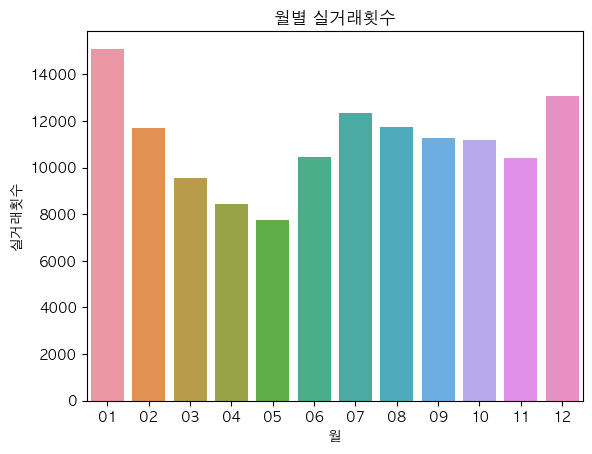

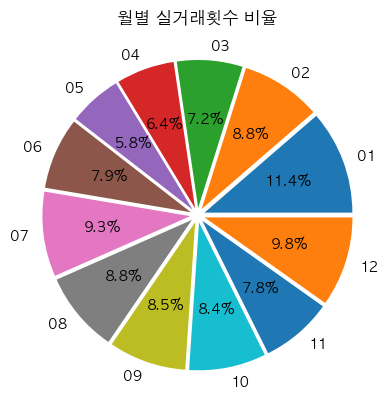

In [35]:
# 월별 실거래 건수 비교
mc_price = pd.DataFrame(eda_pj['실거래금액'])
mc_price['월'] = month
mc_price = mc_price[mc_price['실거래금액'] > 0] # 실거래금액이 0 초과인 데이터만 필터링
# 월별로 실거래금액의 row갯수를 count해서 Dataframe 생성
m_price_c = mc_price.groupby(['월'])['실거래금액'].count().reset_index(name='카운트')

# 월별 실거래횟수를 bar그래프로 시각화
sns.barplot(data=m_price_c, x='월', y='카운트')
plt.title("월별 실거래횟수")
plt.xlabel("월")
plt.ylabel("실거래횟수")

plt.show()
 
# 월별 실거래횟수를 pie그래프로 시각화
value = m_price_c['카운트']
label = m_price_c['월']
explode = [0.05] * 12

plt.title("월별 실거래횟수 비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

# 월별 매출금액과 거래횟수 비교 그래프

/var/folders/gb/s4hx05y95mvdsf9ymsgq17740000gn/T/ipykernel_2643/3919780533.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f"{int(y/10000):,}만원" for y in ax1.get_yticks()])


<Figure size 640x480 with 0 Axes>

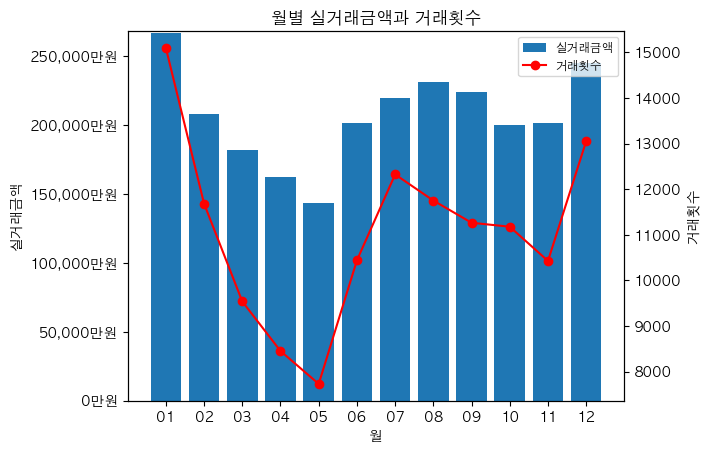

In [36]:
# 월별 실거래금액과 거래횟수 그래프

# 그래프 x축 데이터
x = price_ms['월']

# 그래프 y축 데이터
y1 = price_ms['실거래금액']
y1_max = max(y1)
y2 = m_price_c['카운트']

# 위치 조정
plt.subplots_adjust(bottom=0.2, left=0.1)

# 첫 번째 y축(ax1)은 막대 그래프로 표현
fig, ax1 = plt.subplots()
ax1.bar(x, y1, label='실거래금액')
ax1.set_xlabel('월')
ax1.set_ylabel('실거래금액')

# y축(ax1) 범위 자동 조절
ax1.set_ylim([0, y1_max+10000000])

# y축(ax2)은 선 그래프로 표현
ax2 = ax1.twinx()
ax2.plot(x, y2, '-o', color='red', label='거래횟수')
ax2.set_ylabel('거래횟수')

# y축 tick format 변경
ax1.set_yticklabels([f"{int(y/10000):,}만원" for y in ax1.get_yticks()])

# 범례 표시
handles, labels = [], []
for ax in [ax1, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l
plt.legend(handles, labels, loc='best', fontsize='small')

# 그래프 제목
plt.title('월별 실거래금액과 거래횟수')

plt.show()


In [37]:
# 두 데이터프레임에서 월을 삭제후 병합하여 데이터프레임 msc 생성
msc = pd.concat([m_price_c.drop('월', axis=1), price_ms.drop('월', axis=1)], axis=1)

# 상관계수(Correlation Coefficient)를 구하여 출력
corr = msc.corr().iloc[0,1]
print(f"상관계수: {corr:.2f}")


상관계수: 0.97


### 월별 실거래금액과 거래횟수의 상관관계는 0.97로 양의 상관관계가 확실하다.
- 3, 4, 5월은 거래횟수에 비해 실거래금액이 높다. 이유는?

# 월별 환불금액 비교

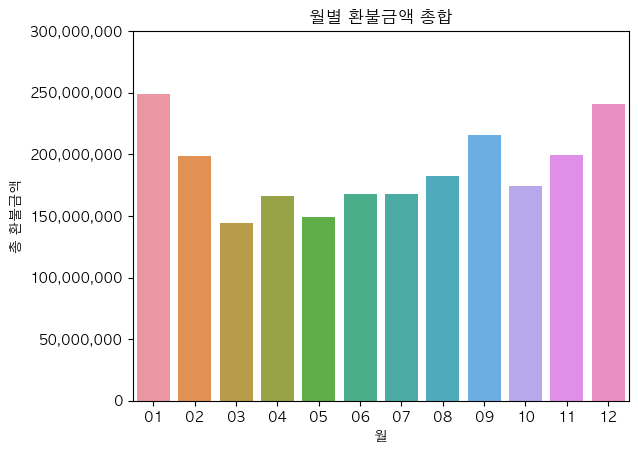

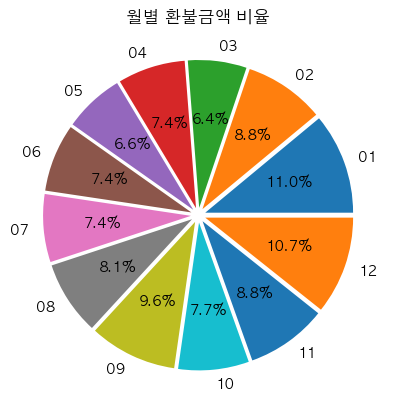

In [38]:
# 월별 환불금액 비교

# 월별 환불금액 Dataframe 생성
m_refund = pd.DataFrame(eda_pj['환불금액'])
m_refund['월'] = month

# 환불금액에 값이 없는 row 제거
m_refund.drop(m_refund[m_refund['환불금액'] == ""].index, inplace=True)

# 환불금액의 Dtype을 int로 변경
m_refund['환불금액'] = m_refund['환불금액'].astype(int)

# 환불금액을 월별로 합산
refund_m = m_refund.groupby('월')['환불금액'].sum().abs().reset_index()

# 월별 실거래금액 총합을 bar그래프로 시각화
sns.barplot(data=refund_m, x='월', y='환불금액')
plt.title("월별 환불금액 총합")
plt.xlabel("월")
plt.ylabel("총 환불금액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()
 
# 월별 환불금액 총합을 pie그래프로 시각화
value = refund_m['환불금액']
label = refund_m['월']
explode = [0.05] * 12

plt.title("월별 환불금액 비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

### 월별 환불 금액도 1월, 12월에 가장 많았다.
- 거래금액과 환불금액이 똑같이 1, 12월에 가장 많았던 이유는 무엇일까?

# 카테고리별 환불금액 비교

   index   카테고리       환불금액
0     10  프로그래밍  705393654
    index    카테고리  환불금액
10      8  크리에이티브     0


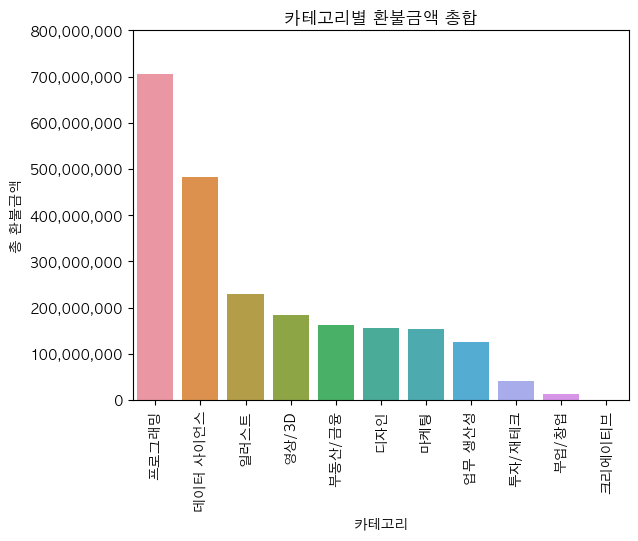

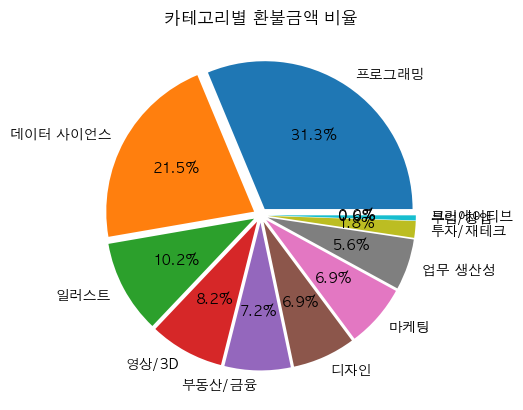

In [39]:
# 카테고리별 환불금액

# 카테고리, 환불금액을 새로운 Dataframe에 저장
c_refund = pd.DataFrame(eda_pj[['환불금액', '카테고리']])

# 카테고리별 환불금액 총합을 price_ms에 저장
refund_c = c_refund.groupby('카테고리')['환불금액'].sum().abs().reset_index() 

# 카테고리별 환불금액 총합의 내림차순으로 정렬
refund_c = refund_c.sort_values('환불금액', ascending=False).reset_index()

# 환불금액이 제일 많은 카테고리, 제일 적은 카테고리 출력
print(refund_c.head(1))
print(refund_c.tail(1))

# 카테고리별 환불금액 총합을 bar그래프로 시각화
sns.barplot(data=refund_c, x='카테고리', y='환불금액')
plt.title("카테고리별 환불금액 총합")
plt.xlabel("카테고리")
plt.xticks(rotation=90)
plt.ylabel("총 환불금액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()
 
# 카테고리별 환불금액 총합을 pie그래프로 시각화
value = refund_c['환불금액']
label = refund_c['카테고리']
explode = [0.05] * 11

plt.title("카테고리별 환불금액 비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

# 카테고리별 평균 매출 비교

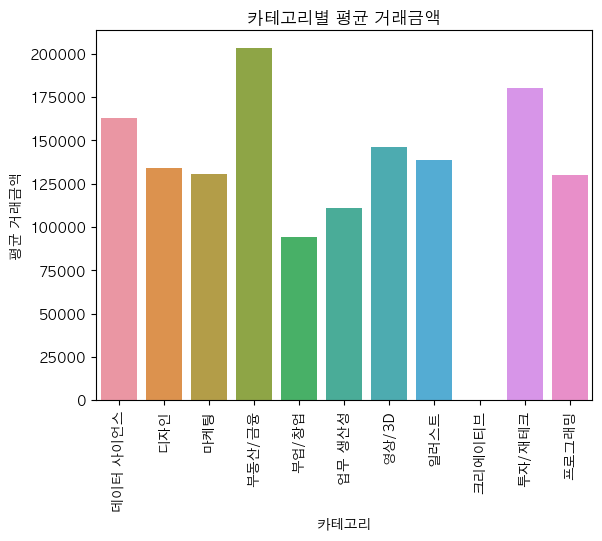

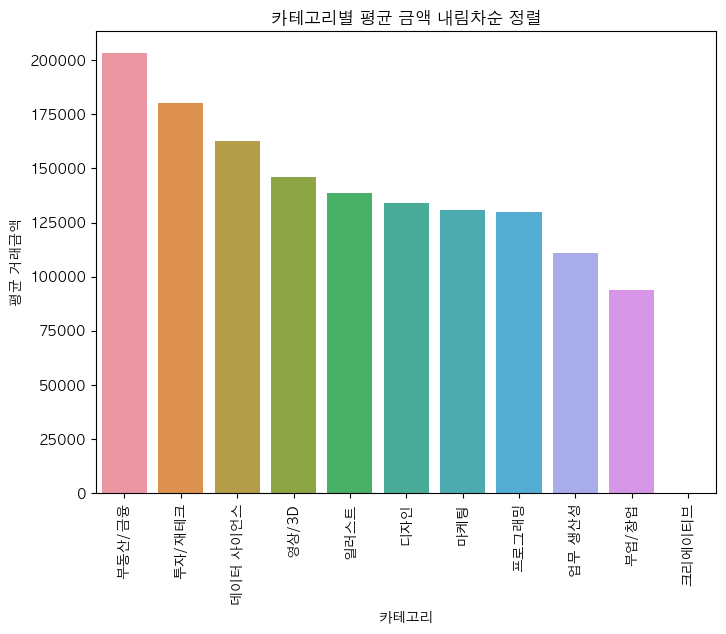

In [40]:

### 카테고리와 실거래 금액을 추출하여 Dataframe 생성
price_c = pd.DataFrame({
    '카테고리': eda_pj['카테고리'],
    '거래금액': eda_pj['실거래금액']    
})

### 카테고리 별 그룹화 하여 평균 거래금액을 c_price에 저장
c_price = price_c.groupby(by='카테고리').mean()
c_price

### 각 카테고리별 평균 거래금액을 그래프화
sns.barplot(x=c_price.index, y=c_price['거래금액'], data=c_price)
plt.xticks(rotation=90)
plt.title("카테고리별 평균 거래금액")
plt.xlabel("카테고리")
plt.ylabel("평균 거래금액")
plt.show()


### 각 별 평균 거래금액을 내림차순으로 정렬하여 그래프화
c_price = c_price.pivot_table(index=c_price.index, values='거래금액').sort_values(by='거래금액', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=c_price, x=c_price.index, y='거래금액')
plt.xticks(rotation=90)
plt.title("카테고리별 평균 금액 내림차순 정렬")
plt.xlabel("카테고리")
plt.ylabel("평균 거래금액")
plt.show()


### 부동산/금융,투자/재테크.데이터사이언스 순으로 강의 판매 금액이 많다 .
- 실제 판매 건수와 비교해서 부동산/금융의 판매건수를 확인하자.

# 카테고리별 거래건수 비교

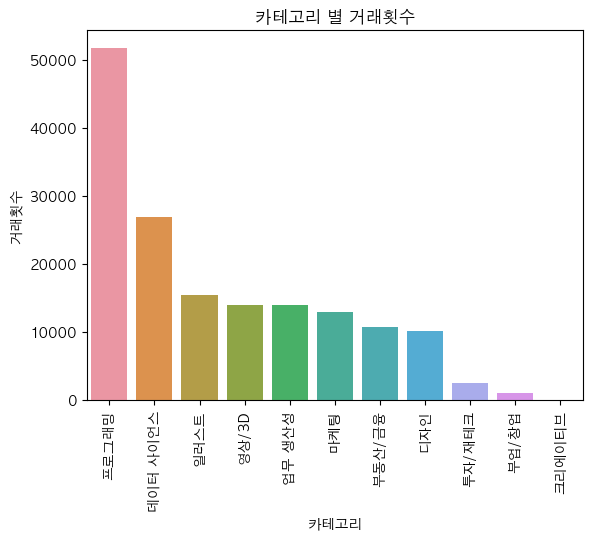

In [41]:
# 카테고리별 거래횟수 
count_c = eda_pj.groupby('카테고리').size().reset_index(name='카운트')

# 거래횟수 내림차순으로 정렬
c_count = count_c.sort_values('카운트', ascending=False)

# 카테고리 별 거래횟수 시각화
sns.barplot(x='카테고리', y='카운트', data=c_count)
plt.xticks(rotation=90)
plt.title("카테고리 별 거래횟수")
plt.xlabel("카테고리")
plt.ylabel("거래횟수")
plt.show()


# 카테고리별 총 매출 비교

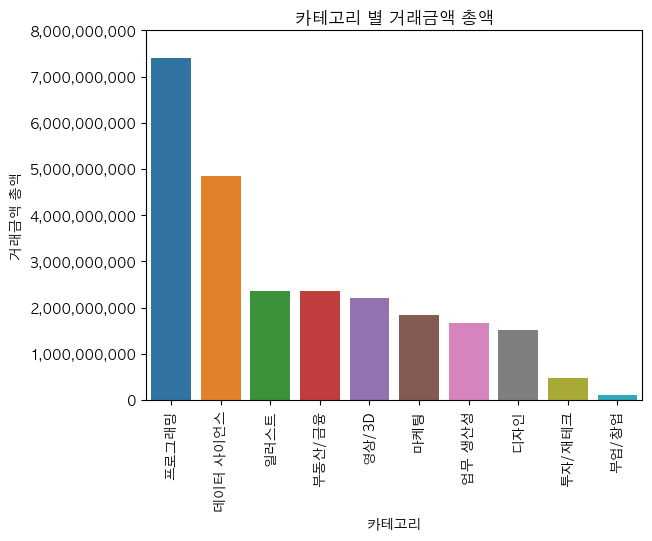

In [42]:
# 카테고리별 총 거래금액

# 카테고리 실거래금액 Dataframe 생성
price_s = eda_pj[['카테고리', '실거래금액']]

# 실거래금액 값이 0 초과인것만 선택
s_price = price_s[price_s['실거래금액'] > 0]

# 카테고리별 실거래금액의 총합을 계산
s_price = s_price.groupby('카테고리')['실거래금액'].sum().reset_index()

# 실거래금액의 내림차순으로 정령
s_price = s_price.sort_values('실거래금액', ascending=False)

# 카테고리 별 실거래금액 총합 시각화
sns.barplot(x='카테고리', y='실거래금액', data=s_price)
plt.xticks(rotation=90)
plt.title("카테고리 별 거래금액 총액")
plt.xlabel("카테고리")
plt.ylabel("거래금액 총액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()


# 부업/창업 카테고리 월별 매출

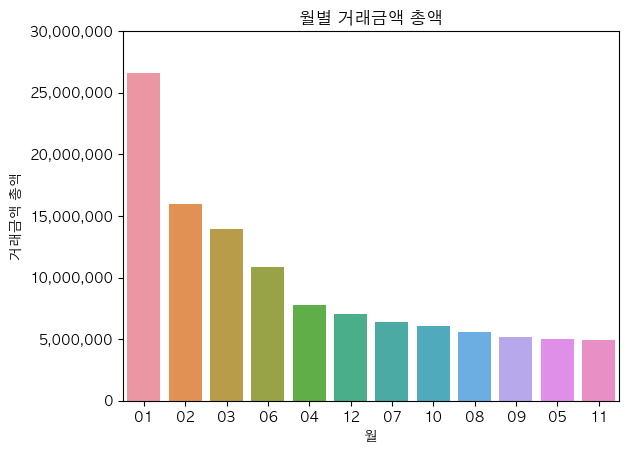

    월      거래금액
0  01  26565600
     월     거래금액
10  11  4916000


In [43]:
# 카테고리중 부업/창업 비교

# 카테고리 값이 프로그래밍인 값만 뽑아서 cat_pro Dataframe에 저장
cat_sub = pd.DataFrame(eda_pj[eda_pj['카테고리'] == '부업/창업'])

# 월별 거래금액의 합으로 그룹화
m_sub = cat_sub.groupby('월')['거래금액'].sum().reset_index()

# 거래금액의 내림차순으로 정령
m_sub_s = m_sub.sort_values('거래금액', ascending=False)

# 월별 거래금액 총합 시각화
sns.barplot(x='월', y='거래금액', data=m_sub_s)
plt.title("월별 거래금액 총액")
plt.xlabel("월")
plt.ylabel("거래금액 총액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()

print(m_sub_s.head(1))
print(m_sub_s.tail(1))


# 부업/창업 카테고리 월별 거래횟수

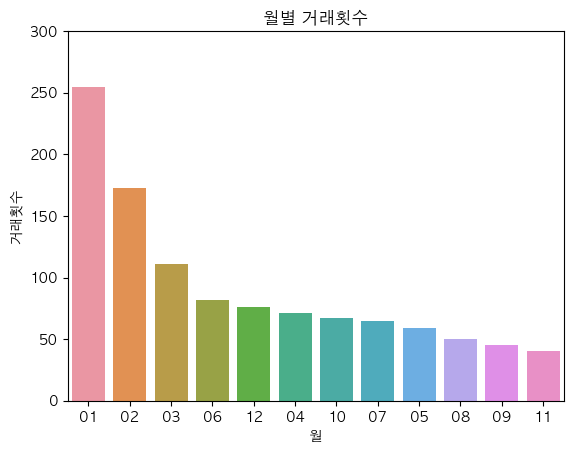

    월  카운트
0  01  255
     월  카운트
10  11   40


In [44]:
# 월별 거래횟수로 그룹화
c_sub = cat_sub.groupby('월')['거래금액'].count().reset_index(name='카운트')

# 거래횟수의 내림차순으로 정령
c_sub_s = c_sub.sort_values('카운트', ascending=False)

# 월별 거래횟수 총합 시각화
sns.barplot(x='월', y='카운트', data=c_sub_s)
plt.title("월별 거래횟수")
plt.xlabel("월")
plt.ylabel("거래횟수")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()

print(c_sub_s.head(1))
print(c_sub_s.tail(1))


# 부업/창업 카테고리 월별 거래금액/거래횟수 그래프

/var/folders/gb/s4hx05y95mvdsf9ymsgq17740000gn/T/ipykernel_2643/2031268951.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f"{int(y/10000):,}만원" for y in ax1.get_yticks()])


<Figure size 640x480 with 0 Axes>

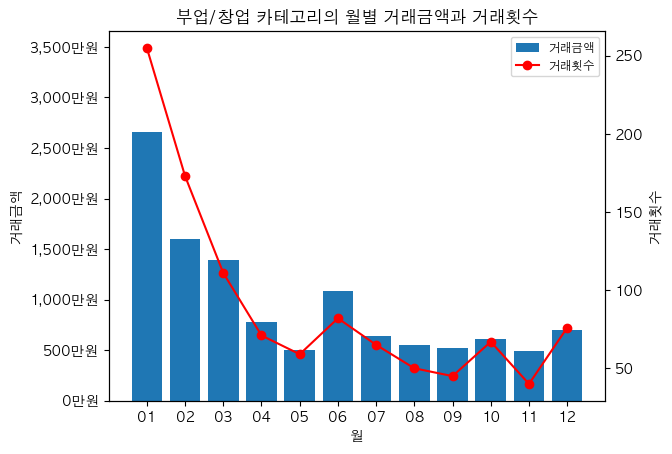

In [45]:
# 월별 거래금액과 거래횟수 그래프

# 그래프 x축 데이터
x = m_sub['월']

# 그래프 y축 데이터
y1 = m_sub['거래금액']
y1_max = max(y1)
y2 = c_sub['카운트']

# 위치 조정
plt.subplots_adjust(bottom=0.2, left=0.1)

# 첫 번째 y축(ax1)은 막대 그래프로 표현
fig, ax1 = plt.subplots()
ax1.bar(x, y1, label='거래금액')
ax1.set_xlabel('월')
ax1.set_ylabel('거래금액')

# y축(ax1) 범위 자동 조절
ax1.set_ylim([0, y1_max+10000000])

# y축(ax2)은 선 그래프로 표현
ax2 = ax1.twinx()
ax2.plot(x, y2, '-o', color='red', label='거래횟수')
ax2.set_ylabel('거래횟수')

# y축 tick format 변경
ax1.set_yticklabels([f"{int(y/10000):,}만원" for y in ax1.get_yticks()])

# 범례 표시
handles, labels = [], []
for ax in [ax1, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l
plt.legend(handles, labels, loc='best', fontsize='small')

# 그래프 제목
plt.title('부업/창업 카테고리의 월별 거래금액과 거래횟수')

plt.show()


# 부업/창업 카테고리의 매출/거래횟수 상관계수

In [46]:
# 두 데이터프레임에서 월을 삭제후 병합하여 데이터프레임 msc 생성
mc_sub = pd.concat([m_sub.drop('월', axis=1), c_sub.drop('월', axis=1)], axis=1)

# 상관계수(Correlation Coefficient)를 구하여 출력
mc_corr = mc_sub.corr().iloc[0,1]
print(f"상관계수: {mc_corr:.2f}")


상관계수: 0.98


# 부업/창업 카테고리의 월별 환불금액

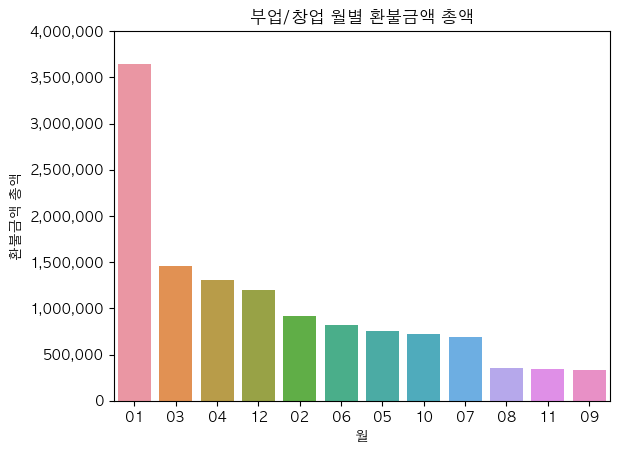

    월     환불금액
0  01  3642803
    월    환불금액
8  09  329000


In [47]:
# 월별 환불금액의 합으로 그룹화
r_sub = cat_sub.groupby('월')['환불금액'].sum().abs().reset_index()

# 환불금액의 내림차순으로 정령
r_sub = r_sub.sort_values('환불금액', ascending=False)

# 월별 환불금액 총합 시각화
sns.barplot(x='월', y='환불금액', data=r_sub)
plt.title("부업/창업 월별 환불금액 총액")
plt.xlabel("월")
plt.ylabel("환불금액 총액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()

print(r_sub.head(1))
print(r_sub.tail(1))


# 초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring) 코스에서 쿠폰사용 비율

2788
1475


/var/folders/gb/s4hx05y95mvdsf9ymsgq17740000gn/T/ipykernel_2643/2551056385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cho['쿠폰할인액'] = cho['쿠폰할인액'].replace('-', 0).astype(int)


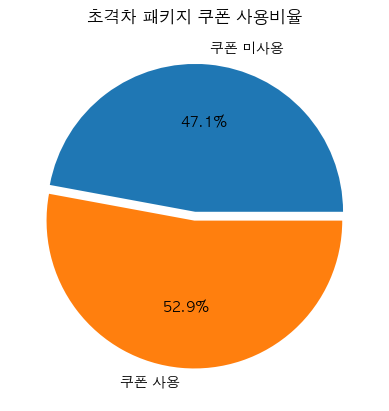

In [48]:
# 프로그래밍 카테고리에서 가장 많이 환불된 코스를 살펴보자

# 초격차 패키지 총 판매 갯수
cho = cat_pro[cat_pro['코스ID'] == 211368]
print(cho['코스ID'].count())
c_cho = cho['코스ID'].count()

# 초격차 패키지 판매중 할인쿠폰 사용 수
cho['쿠폰할인액'] = cho['쿠폰할인액'].replace('-', 0).astype(int)
cho_v = cho[cho['쿠폰할인액'] != 0].reset_index()
print(cho_v['코스ID'].count())
c_cho_v = cho_v['코스ID'].count()

# 초격차 패키지 판매수량 중 할인쿠폰 사용 비중
value = [(c_cho - c_cho_v), c_cho_v]
label = ['쿠폰 미사용', '쿠폰 사용']
explode = [0.03] * 2

plt.title("초격차 패키지 쿠폰 사용비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

# 카테고리별 환불 횟수 비교

In [50]:
# 카테고리별 환불횟수

# 월별 총 환불금액을 새로운 Dataframe에 저장
count_refund = pd.DataFrame(eda_pj[['환불금액', '카테고리']])

# 환불금액 값이 0 초과인것만 선택
count_refund = count_refund[count_refund['환불금액'] > 0]

# 카테고리별 환불 카운트를 refund_count에 저장
refund_count = count_refund.groupby('카테고리')['환불금액'].count().reset_index(name='카운트') 
# 카테고리별 환불 카운트 내림차순으로 정렬
s_refund_count = refund_count.sort_values('카운트', ascending=False).reset_index()

# 환불이 가장 많은 건수 출력
print(s_refund_count.head(1))
# 환불이 가장 적은 건수 출력
print(s_refund_count.tail(2))

# 카테고리별 환불횟수 bar그래프로 시각화
sns.barplot(data=s_refund_count, x='카테고리', y='카운트')
plt.title("카테고리별 환불횟수 총합")
plt.xlabel("카테고리")
plt.xticks(rotation=90)
plt.ylabel("환불횟수")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()
 
# 카테고리별 환불비율을 pie그래프로 시각화
value = s_refund_count['카운트']
label = s_refund_count['카테고리']
explode = [0.05] * 10

plt.title("카테고리별 환불횟수 비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

Empty DataFrame
Columns: [index, 카테고리, 카운트]
Index: []
Empty DataFrame
Columns: [index, 카테고리, 카운트]
Index: []


ValueError: min() arg is an empty sequence

# 프로그래밍 카테고리 월별 매출금액 비교

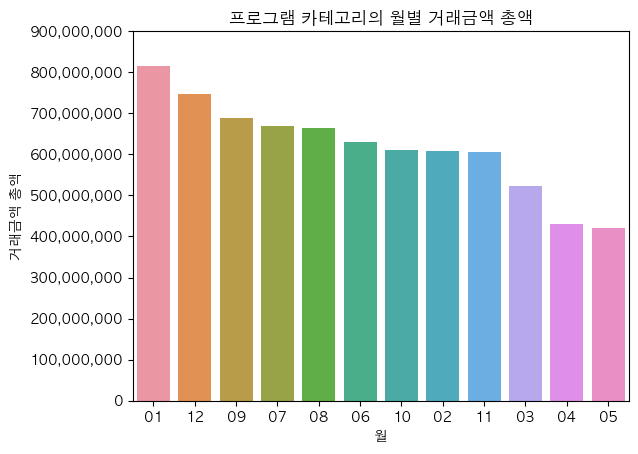

    월       거래금액
0  01  814249750
    월       거래금액
4  05  421462400


In [ ]:
# 카테고리 값이 프로그래밍인 값만 뽑아서 cat_pro Dataframe에 저장
cat_pro = pd.DataFrame(eda_pj[eda_pj['카테고리'] == '프로그래밍'])

# 월별 거래금액의 합으로 그룹화
m_pro = cat_pro.groupby('월')['거래금액'].sum().reset_index()

# 거래금액의 내림차순으로 정령
m_pro = m_pro.sort_values('거래금액', ascending=False)

# 월별 거래금액 총합 시각화
sns.barplot(x='월', y='거래금액', data=m_pro)
plt.title("프로그램 카테고리의 월별 거래금액 총액")
plt.xlabel("월")
plt.ylabel("거래금액 총액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()

print(m_pro.head(1))
print(m_pro.tail(1))


# 프로그래밍 카테고리의 월별 환불금액 비교

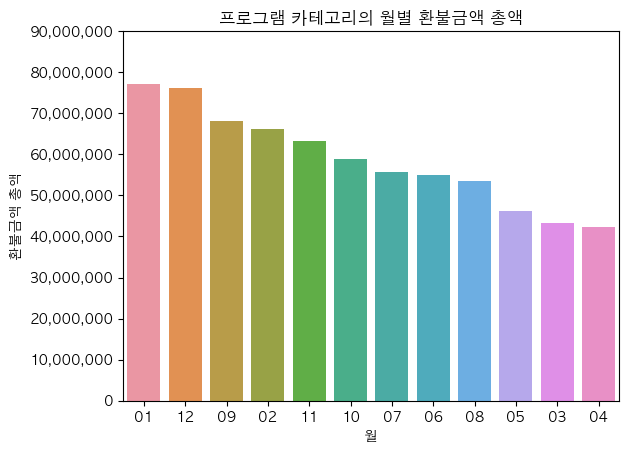

    월      환불금액
0  01  77200112
    월      환불금액
3  04  42383568


In [ ]:
# 프로그래밍 카테고리
cat_pro

# 월별 거래금액의 합으로 그룹화
r_pro = cat_pro.groupby('월')['환불금액'].sum().abs().reset_index()

# 거래금액의 내림차순으로 정령
r_pro = r_pro.sort_values('환불금액', ascending=False)

# 월별 거래금액 총합 시각화
sns.barplot(x='월', y='환불금액', data=r_pro)
plt.title("프로그램 카테고리의 월별 환불금액 총액")
plt.xlabel("월")
plt.ylabel("환불금액 총액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()

print(r_pro.head(1))
print(r_pro.tail(1))

# 프로그래밍 카테고리에서 코스별 매출건수 비교

      코스ID                                      코스(상품) 이름   카운트
68  211368  초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring)  2788
19  203720                    초격차 패키지 : 한 번에 끝내는 프론트엔드 개발  2679
16  203525        초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터  2330


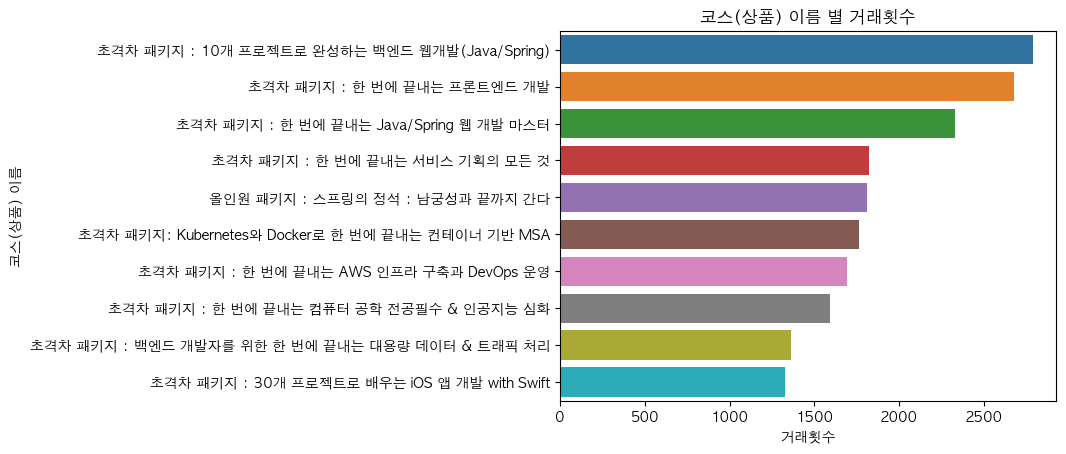

In [ ]:
# 프로그래밍 카테고리에서 환불된 거래만 re_pro dataframe에 저장
#pro_co = cat_pro[cat_pro['거래금액'] > 0]

# 코스별 거래횟수 
co_pro = cat_pro.groupby(['코스ID', '코스(상품) 이름'])['거래금액'].size().reset_index(name='카운트')

# 거래횟수 내림차순으로 정렬
co_pro = co_pro.sort_values('카운트', ascending=False)

# 상위 10개의 데이터 선택
co_pro2 = co_pro[:10]

# 상위 3개의 구매량 출력
print(co_pro2.head(3))

# 카테고리 별 거래횟수 시각화
sns.barplot(x='카운트', y='코스(상품) 이름', data=co_pro2, orient='h')
plt.title("코스(상품) 이름 별 거래횟수")
plt.xlabel("거래횟수")
plt.ylabel("코스(상품) 이름")
plt.show()



# 프로그래밍 카테고리에서 코스별 매출금액 비교

      코스ID                                          코스(상품) 이름         매출
19  203720                        초격차 패키지 : 한 번에 끝내는 프론트엔드 개발  433555600
46  207343                    올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다  399489400
54  208963  초격차 패키지: Kubernetes와 Docker로 한 번에 끝내는 컨테이너 기반 MSA  392779760
      코스ID                                        코스(상품) 이름         매출
42  206717         초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영  251397500
66  211087                  초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것  244770800
77  212720  초격차 패키지 : 백엔드 개발자를 위한 한 번에 끝내는 대용량 데이터 & 트래픽 처리  187185250


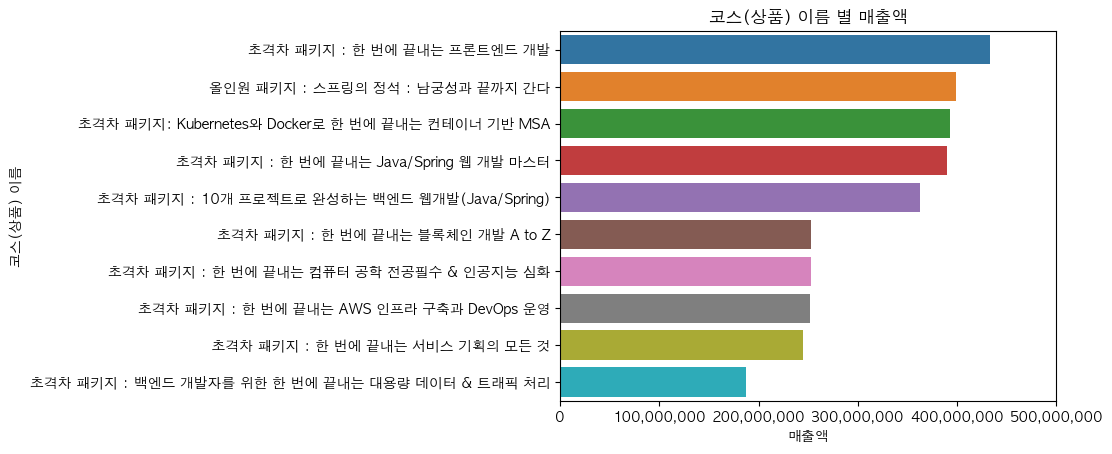

In [ ]:
# 코스별 거래횟수 
sum_pro = cat_pro.groupby(['코스ID', '코스(상품) 이름'])['거래금액'].sum().reset_index(name='매출')

# 거래횟수 내림차순으로 정렬
sum_pro = sum_pro.sort_values('매출', ascending=False)

# 상위 10개의 데이터 선택
sum_pro2 = sum_pro[:10]

# 상위 3개의 구매량 출력
print(sum_pro2.head(3))
print(sum_pro2.tail(3))

# 카테고리 별 거래횟수 시각화
sns.barplot(x='매출', y='코스(상품) 이름', data=sum_pro2, orient='h')
plt.title("코스(상품) 이름 별 매출액")
plt.xlabel("매출액")
plt.xticks(plt.xticks()[0], [f"{int(x_value):,}" for x_value in plt.xticks()[0]])
plt.ylabel("코스(상품) 이름")
plt.show()



# 프로그래밍 카테고리의 코스별 쿠폰 사용 비율

0     52.905308
1     50.466592
2     50.042918
3     49.670692
4     54.334622
        ...    
87    24.390244
88    62.500000
89    72.222222
90          NaN
91          NaN
Name: 비율, Length: 92, dtype: float64


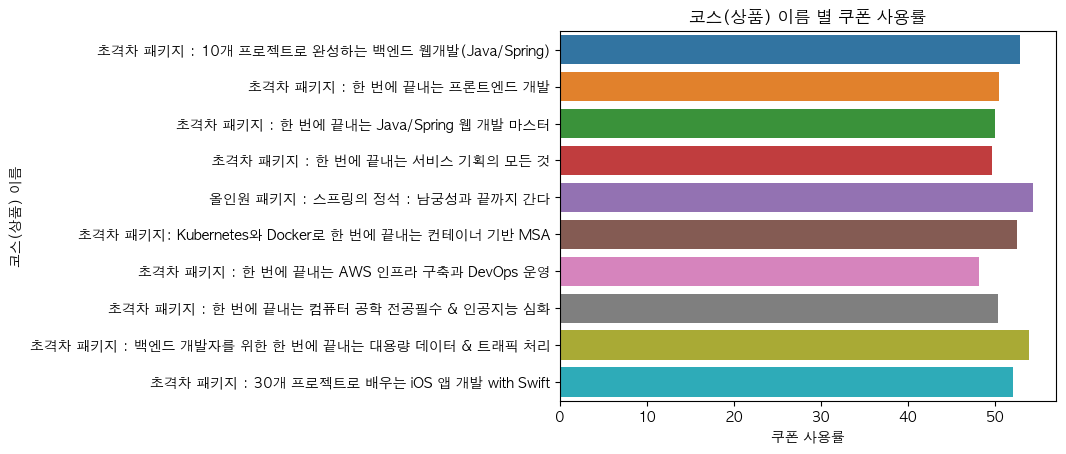

In [ ]:
# 각 코스별 쿠폰사용 건수

# 쿠폰 할인액이 0보다 큰 데이터를 cu_pro에 저장
cu_pro = cat_pro[cat_pro['쿠폰할인액'] > 0]

# 코스ID와 코스이름별로 쿠폰사용 횟수를 저장
pro_cu = cu_pro.groupby(['코스ID', '코스(상품) 이름'])['쿠폰할인액'].count().reset_index(name='쿠폰')

# 매출 수량(co_pro)과 쿠폰사용수량(pro_cu)를 코스ID와 코스이름을 기준으로 merge (거래량이 많은순 정렬을 위해 co_pro에 left join함)
merged_pro = co_pro.merge(pro_cu, how='left', on=['코스ID', '코스(상품) 이름'])

# 쿠폰 / 카운트 * 100 한 값을 비율 column으로 추가
merged_pro['비율'] = (merged_pro['쿠폰'] / merged_pro['카운트']) * 100

# 거래량이 많은순으로 상위 10개의 데이터 선택
merged_pro2 = merged_pro[:10]

# 상위 3개의 구매량 출력
print(merged_pro['비율'])

# 카테고리 별 거래횟수 시각화
sns.barplot(x='비율', y='코스(상품) 이름', data=merged_pro2, orient='h')
plt.title("코스(상품) 이름 별 쿠폰 사용률")
plt.xlabel("쿠폰 사용률")
plt.ylabel("코스(상품) 이름")
plt.show()


# 코스별 거래횟수와 쿠폰사용률의 상관계수

In [ ]:
# 상관계수(Correlation Coefficient)를 구하여 출력
corr = co_pro['카운트'].corr(merged_pro['비율'])
print(f"상관계수: {corr:.3f}")

상관계수: -0.007


# 결제수단별 총거래금액

   index   결제수단           매출
0      0   CARD  19067639435
1      1  POINT   3464436723
2      3  TRANS   1013797110


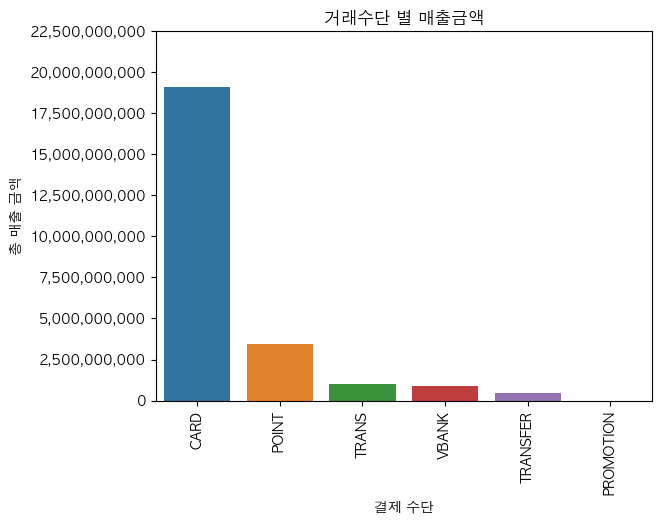

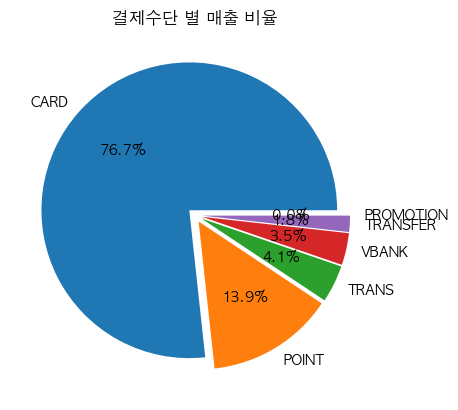

In [ ]:
# 결제수단별로 그룹화 하여 거래금액 총합을 매출행으로 지정해서 patment dataframe에 저장
payment = eda_pj.groupby('결제수단')['거래금액'].sum().reset_index(name='매출')

# 결제수단별 거래금액 총합의 내림차순으로 정렬
payment = payment.sort_values('매출', ascending=False).reset_index()

# 거래금액 상위 3개의 데이터 출력
print(payment.head(3))

# 결제수단 별 거래금액 총합을 bar그래프로 시각화
sns.barplot(data=payment, x='결제수단', y='매출')
plt.title("거래수단 별 매출금액")
plt.xlabel("결제 수단")
plt.xticks(rotation=90)
plt.ylabel("총 매출 금액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()
 
# 결제수단 별 거래금액 비율을 pie그래프로 시각화
value = payment['매출']
label = payment['결제수단']
explode = [0.05] * 6

plt.title("결제수단 별 매출 비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

# 결제수단별 결제 횟수

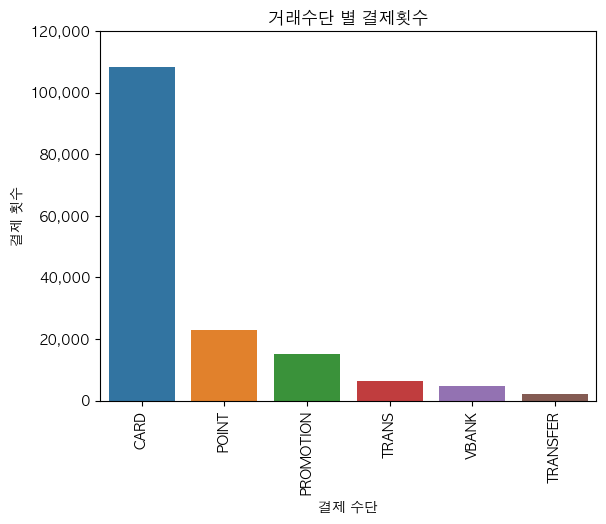

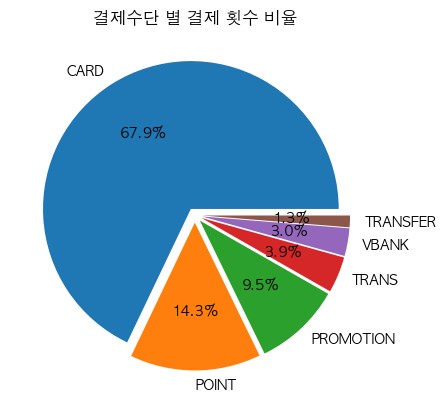

In [55]:
# 결제수단별로 그룹화 하여 거래횟수를 patment_c dataframe에 저장
payment_c = eda_pj.groupby('결제수단')['거래금액'].count().reset_index(name='카운트')

#결제수단별 결제횟수의 내림차순으로 정렬
payment_c2 = payment_c.sort_values('카운트', ascending=False).reset_index()

# 결제수단 별 결제 횟수를 bar그래프로 시각화
sns.barplot(data=payment_c2, x='결제수단', y='카운트')
plt.title("거래수단 별 결제횟수")
plt.xlabel("결제 수단")
plt.xticks(rotation=90)
plt.ylabel("결제 횟수")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()
 
# 결제수단 별 결제 횟수 비율을 pie그래프로 시각화
value = payment_c2['카운트']
label = payment_c2['결제수단']
explode = [0.05] * 6

plt.title("결제수단 별 결제 횟수 비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

# 결제수단 별 평균 결제금액

   index       결제수단           평균금액
0      4   TRANSFER  215947.835052
1      5      VBANK  179908.638060
2      0       CARD  176219.358203
3      3      TRANS  161381.265521
4      1      POINT  152095.738125
5      2  PROMOTION       0.000000


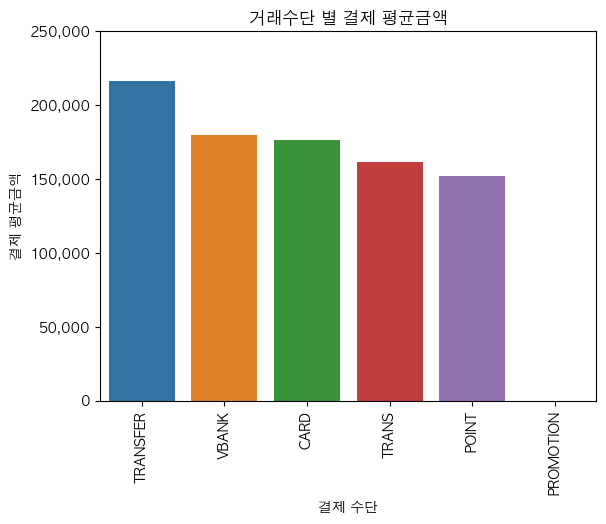

In [54]:
# 결제수단별로 그룹화 하여 거래금액의 평균을 patment_m dataframe에 저장
payment_m = eda_pj.groupby('결제수단')['거래금액'].mean().reset_index(name='평균금액')

# 결제수단별 결제 평균금액의 내림차순으로 정렬
payment_m2 = payment_m.sort_values('평균금액', ascending=False).reset_index()

# 평균금액 출력
print(payment_m2.head(6))

# 결제수단 별 결제 평균금액을 bar그래프로 시각화
sns.barplot(data=payment_m2, x='결제수단', y='평균금액')
plt.title("거래수단 별 결제 평균금액")
plt.xlabel("결제 수단")
plt.xticks(rotation=90)
plt.ylabel("결제 평균금액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()
 

# 결제수단과 거래금액 평균의 상관계수

In [58]:
# 상관계수(Correlation Coefficient)를 구하여 출력
corr = payment_c['카운트'].corr(payment_m['평균금액'])
print(f"상관계수: {corr:.3f}")


상관계수: 0.087


# 프로그래밍 카테고리에서 환불이 많았던 코스 내림차순 정리

In [ ]:
# 프로그래밍 카테고리에서 환불된 거래만 re_pro dataframe에 저장
re_pro = cat_pro[cat_pro['환불금액'] != 0]
# 코스 이름 별로 그룹화 하여 환불된 횟수를 카운트
re_pro = re_pro.groupby(['코스(상품) 이름', '코스ID'])['환불금액'].count().reset_index(name='카운트')
# 환불 횟수의 내림차순으로 정렬
re_pro_c = re_pro.sort_values('카운트', ascending=False)
#환불 횟수가 가장 많은 코스 이름 확인
re_pro_c.head(10)

,코스(상품) 이름,코스ID,카운트
56,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),211368,268
72,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,203525,222
80,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,203720,202
51,올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다,207343,174
81,초격차 패키지: Kubernetes와 Docker로 한 번에 끝내는 컨테이너 기반 MSA,208963,137
60,초격차 패키지 : 30개 프로젝트로 배우는 프론트엔드 with React,208856,136
2,초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것,211087,133
77,초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화,206060,116
59,초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift,205949,113
71,초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영,206717,108


In [ ]:
# 각 쿠폰의 사용 횟수를 출력합니다.
coupon_counts = eda_pj['쿠폰이름'].value_counts()
print(coupon_counts)

filtered_coupons = eda_pj[~eda_pj['쿠폰이름'].str.contains('재발급')]

# 각 쿠폰의 사용 횟수를 출력합니다.
coupon_counts = filtered_coupons['쿠폰이름'].value_counts()
print(coupon_counts)

# 전체 쿠폰 종류의 개수를 출력합니다.
total_unique_coupons = filtered_coupons['쿠폰이름'].nunique()

쿠폰이름
-                                                            82946
[WELCOME] 온라인 강의 3만원 할인                                      11168
[프로모션] 1월 1+1 수강권 이벤트                                         3192
[프로모션] 12월 1+1 수강권 이벤트                                        3187
[WELCOME] 3월이니까? 3만원 할인!                                      2305
                                                             ...  
[2만원 할인 쿠폰] 실무 사례로 배우는 컴퓨터 비전 논문 구현과 알고리즘 성능 최적화 2만원 할인쿠폰        1
[예외 재발급] [WELCOME] 온라인 강의 20%할인                                  1
[예외 재발급] [WELCOME] 온라인 강의 3만원 할인                                 1
[예외 재발급] [프로모션] 6월 1+1 이벤트                                       1
[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰                                     1
Name: count, Length: 1227, dtype: int64
쿠폰이름
-                                                                 82946
[WELCOME] 온라인 강의 3만원 할인                                           11168
[프로모션] 1월 1+1 수강권 이벤트                                              31